### **K-Means Clustering: Step-by-Step Explanation**

K-Means is one of the most popular clustering algorithms. It aims to partition the data into \(k\) clusters, where each data point belongs to the cluster with the nearest mean (centroid).

---

### **Step 1: Initialize the Centroids**

- Select the number of clusters $(k)$ you want to form.
- Randomly initialize $k$ centroids in the feature space. These centroids can be:
  1. Random points from the dataset.
  2. Randomly chosen within the feature range.

---

### **Step 2: Assign Points to the Nearest Centroid**

- For each data point in the dataset:
  - Calculate the **distance** between the point and each centroid using a distance metric (e.g., Euclidean distance):
- $
    d(x, c) = \sqrt{\sum_{i=1}^{n}(x_i - c_i)^2}
    $
  - Assign the point to the cluster of the nearest centroid.

---

### **Step 3: Update the Centroids**

- Recalculate the centroid of each cluster as the **mean** of all data points assigned to that cluster:

  $
  c_j = \frac{1}{|C_j|} \sum_{x \in C_j} x
  $
  - Here:
    - $c_j$ is the new centroid of cluster \(j\).
    - $(C_j$ is the set of points in cluster \(j\).
    - $|C_j|$ is the number of points in cluster \(j\).

---

### **Step 4: Repeat Steps 2 and 3**

- Reassign all points to the nearest centroid.
- Update centroids again.

**Stop the iterations when:**
1. **Centroids do not change** (or change is below a threshold).
2. **Maximum number of iterations** is reached.

---

### **Step 5: Output the Results**

- After convergence, the algorithm outputs:
  1. The cluster assignments for each data point.
  2. The final centroids of each cluster.

---

### **Key Points**

1. **Initial Centroids Matter:** Different initial centroids can lead to different results (local minima). This is why techniques like **K-Means++** are used for better initialization.
2. **Sensitive to \(k\):** You must select the right number of clusters (\(k\)) using techniques like the **Elbow Method** or **Silhouette Score**.
3. **Not Ideal for Non-Spherical Clusters:** K-Means assumes clusters are spherical and equally sized.

---

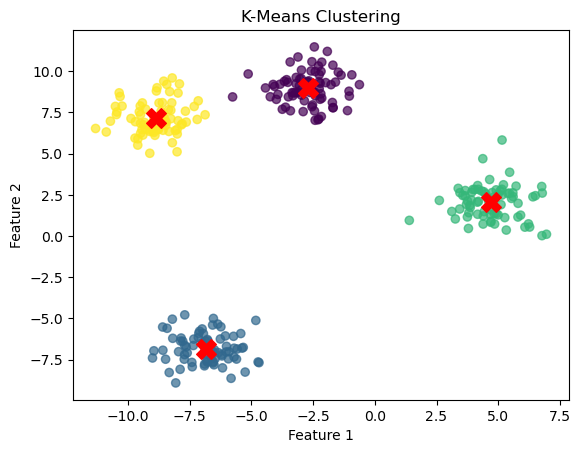

In [13]:
### **K-Means Example in Python**


import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Step 3: Get cluster assignments and centroids
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Step 4: Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### **Visualization of Steps**

1. **Random Initialization:**
   - Place \(k\) centroids randomly.
2. **Assign Points:**
   - Each point is assigned to its nearest centroid.
3. **Recompute Centroids:**
   - Update centroids as the mean of the assigned points.
4. **Repeat:**
   - Iterate until centroids stabilize.

---



## **The Elbow Method for Selecting \(k\) (Number of Clusters)**

The **Elbow Method** is a commonly used technique to determine the optimal number of clusters $(k)$ in K-Means clustering.

---

### **Key Idea**

The Elbow Method evaluates the **within-cluster sum of squares (WCSS)** (also called **inertia**) for different values of \(k\). 

- **WCSS/Inertia** measures how well the points are clustered around their centroids:

  $
  \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - c_i\|^2
  $
  - $k$: Number of clusters.
  - $C_i$: Points in cluster $i$.
  - $c_i$: Centroid of cluster $i$.

- **Lower WCSS** indicates better clustering, as points are closer to their centroids.

---

### **Steps in the Elbow Method**

1. **Run K-Means for different \(k\) values:**
   - Start with $k=1$ and gradually increase $k$.
   - Record the WCSS for each $k$.

2. **Plot the WCSS vs. $k$:**
   - The WCSS decreases as $k$ increases, but the rate of decrease slows down.

3. **Find the "Elbow" Point:**
   - The "elbow" in the plot is the point where the decrease in WCSS slows significantly.
   - This indicates the optimal $k$, as adding more clusters beyond this point doesn't significantly improve clustering.

---

## **Python Implementation of the Elbow Method**

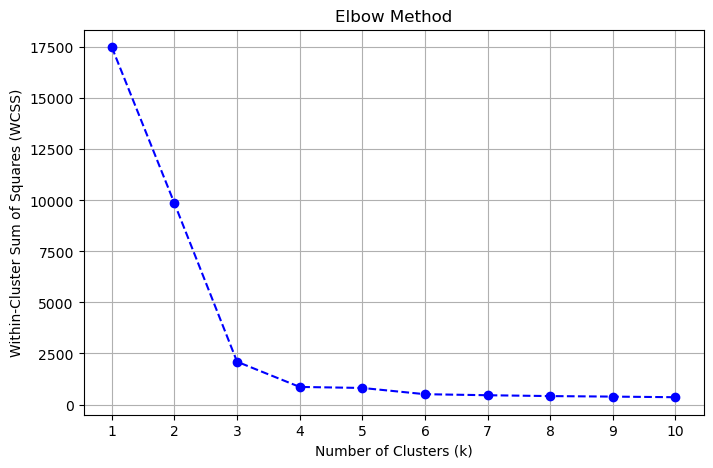

In [55]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=5, random_state=42, cluster_std=1.0)

# Step 2: Compute WCSS for different values of k
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Step 3: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

---

### **Understanding the Elbow Plot**

- **X-Axis:** Number of clusters $(k)$.
- **Y-Axis:** WCSS (inertia).
- The **"elbow"** is the point where the plot transitions from a steep decline to a plateau. 

#### **Example Interpretation:**
If the elbow is at $k=3$:
- $k=3$ is the optimal number of clusters.
- Adding more clusters beyond $k=3$ does not significantly reduce WCSS.

---

### **Advantages of the Elbow Method**

1. Simple and intuitive to use.
2. Works well for datasets with clear cluster separation.

---

### **Limitations of the Elbow Method**

1. **Subjective:** The elbow point is sometimes ambiguous, especially if the curve is smooth.
2. **Assumes distinct clusters:** May not work well if clusters overlap or are not spherical.
3. **Large datasets:** Requires multiple K-Means runs, which can be computationally expensive.

---



## **Silhouette Score for Clustering Validation**

The **Silhouette Score** is a metric used to evaluate the quality of clustering. Unlike the Elbow Method, which focuses on finding $k$, the Silhouette Score provides insight into how well-separated and cohesive the clusters are.

---

### **Key Idea**

The Silhouette Score measures how similar a point is to its **own cluster** compared to **other clusters**. It considers both:
1. **Cohesion:** How close a point is to other points in the same cluster.
2. **Separation:** How far a point is from points in the nearest other cluster.

---

### **Formula**

For a data point $i$:
1. Compute the **average intra-cluster distance** $(a_i)$:
   - Mean distance between $i$ and all other points in the same cluster.
2. Compute the **average inter-cluster distance** $(b_i)$:
   - Mean distance between $i$ and points in the nearest neighboring cluster.

The Silhouette Score $s_i$ for point $i$ is:

$
s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
$

- $s_i$ ranges from $-1$ to $1$:
  - **+1:** Perfectly assigned (well-separated from other clusters).
  - **0:** Overlapping clusters.
  - **-1:** Misclassified (closer to another cluster than its own).

---

### **Overall Silhouette Score**

The overall Silhouette Score is the mean of all $s_i$ values in the dataset:

$
\text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^{n} s_i
$
- **Higher Scores $(\sim 1)$** indicate better-defined clusters.
- **Lower Scores $(\sim 0)$** indicate poor or overlapping clusters.

---

### **Steps to Compute the Silhouette Score**

1. Perform clustering (e.g., using K-Means).
2. Compute the intra-cluster $(a_i)$ and inter-cluster $(b_i)$ distances.
3. Calculate the Silhouette Score for each point.
4. Compute the mean Silhouette Score for the entire dataset.

---

## **Python Implementation of Silhouette Score**

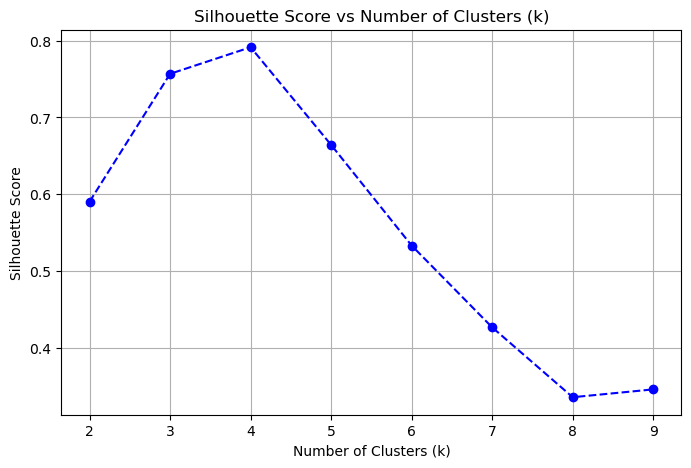

Optimal number of clusters (k): 4


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply K-Means clustering for different k
k_values = range(2, 10)  # Silhouette Score is not meaningful for k=1
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 4: Print the optimal k
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")

---

### **Interpreting Silhouette Scores**

1. **High Silhouette Score $(>0.7)$:**
   - Clusters are well-defined and well-separated.
   - Points within clusters are close to each other.

2. **Moderate Silhouette Score $(0.5 - 0.7)$:**
   - Clusters are fairly separated, but there may be some overlap.

3. **Low Silhouette Score $(<0.5)$:**
   - Poor clustering.
   - Clusters may overlap or have inconsistent shapes.

---

### **Comparison with the Elbow Method**

| **Elbow Method**            | **Silhouette Score**              |
|-----------------------------|-----------------------------------|
| Finds $k$ by reducing WCSS | Evaluates the quality of clustering. |
| May require visual inspection | Provides a numerical score.         |
| Focuses on compactness of clusters | Considers both cohesion and separation. |

---

### **When to Use the Silhouette Score**
- Use the **Silhouette Score** when:
  - You want to evaluate how well your clusters are formed.
  - You want an objective measure for comparing clustering results.
- It works well even when clusters are non-spherical or unevenly distributed.

---



# step by step Explanation with code examples

Let's break down K-means clustering using a simple example with visual steps:

Imagine you have some points on a 2D plane and want to group them into 3 clusters. Here's how K-means works:

### 1. **Starting Point**

In [64]:
# Example data points
data = [
    [2, 3], [2, 4], [3, 2],  # Some points close to each other
    [10, 8], [9, 10], [11, 9],  # Another group of points
    [20, 20], [21, 19], [19, 21]  # A third group
]

### 2. **Step 1: Initialize Centroids**
- Choose K random points as starting centroids (K=3 in our example)

In [66]:
import random
centroids = random.sample(data, 3)  # Pick 3 random points as starting centroids

### 3. **Step 2: Assign Points to Nearest Centroid**

In [68]:
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        # Calculate distances to each centroid
        distances = []
        for centroid in centroids:
            distance = ((point[0] - centroid[0])**2 + 
                       (point[1] - centroid[1])**2)**0.5
            distances.append(distance)
        # Assign point to closest centroid
        closest_centroid = distances.index(min(distances))
        clusters.append(closest_centroid)
    return clusters

### 4. **Step 3: Update Centroids**

In [70]:
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        # Get all points in cluster i
        cluster_points = [data[j] for j in range(len(data)) 
                         if clusters[j] == i]
        # Calculate average position
        centroid_x = sum(p[0] for p in cluster_points) / len(cluster_points)
        centroid_y = sum(p[1] for p in cluster_points) / len(cluster_points)
        new_centroids.append([centroid_x, centroid_y])
    return new_centroids

### 5. **Step 4: Repeat Until Convergence**
```python

In [72]:
def kmeans(data, k, max_iterations=100):
    # Initialize random centroids
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Assign points to clusters
        clusters = assign_clusters(data, centroids)
        
        # Store old centroids
        old_centroids = centroids.copy()
        
        # Update centroids
        centroids = update_centroids(data, clusters, k)
        
        # Check if converged
        if old_centroids == centroids:
            break
            
    return clusters, centroids

**Here's what's happening in simple terms:**

1. First, you randomly pick K points as your starting cluster centers (centroids)
2. For each point in your data:
   - Calculate its distance to each centroid
   - Assign it to the closest centroid's cluster
3. For each cluster:
   - Calculate the average position of all points in the cluster
   - Move the centroid to this average position
4. Repeat steps 2-3 until the centroids stop moving significantly

The algorithm converges when the centroids stabilize and stop moving (or move very little).

Here's how you would use it:

In [74]:
# Run K-means
k = 3
final_clusters, final_centroids = kmeans(data, k)

# Print results
for i in range(len(data)):
    print(f"Point {data[i]} belongs to cluster {final_clusters[i]}")

Point [2, 3] belongs to cluster 0
Point [2, 4] belongs to cluster 0
Point [3, 2] belongs to cluster 0
Point [10, 8] belongs to cluster 2
Point [9, 10] belongs to cluster 2
Point [11, 9] belongs to cluster 2
Point [20, 20] belongs to cluster 1
Point [21, 19] belongs to cluster 1
Point [19, 21] belongs to cluster 1


# Within-Cluster Sum of Squares (WCSS)

The **Within-Cluster Sum of Squares (WCSS)** measures the total squared distance between each data point and the centroid of its cluster. It quantifies how well the data points are clustered around their centroids.

### Formula for WCSS:

$
\text{WCSS} = \sum_{i=1}^K \sum_{x \in C_i} \| x - \mu_i \|^2
$

### Where:
- $K$: Number of clusters.
- $C_i$: The set of points in the $i$-th cluster.
- $x$: A data point in cluster $C_i$.
- $\mu_i$: The centroid (mean) of the \(i\)-th cluster.
- $\| x - \mu_i \|$: The Euclidean distance between a data point $x$ and its cluster centroid $\mu_i$.

### Steps to Compute WCSS:
1. For each cluster:
   - Compute the centroid of the cluster $(\mu_i)$.
   - For each point in the cluster, calculate the squared Euclidean distance to the centroid.
   - Sum up these squared distances for all points in the cluster.
2. Repeat the above step for all clusters and sum the results to get WCSS.

### Purpose of WCSS:
- **Smaller WCSS** indicates that the data points are closer to their cluster centroids, which means the clusters are tight and well-defined.
- It is used in the **Elbow Method** to determine the optimal number of clusters $K$.


# 1. **Euclidean Distance**:
The Euclidean distance between two points $ P_1(x_1, y_1, \dots, z_1) $ and $ P_2(x_2, y_2, \dots, z_2) $ in $ n $-dimensional space is given by:

$
d_{\text{Euclidean}} = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$

For 2D points R(x_1, y_1) $ and $ (x_2, y_2)$ , the formula simplifies to:

$
d_{\text{Euclidean}} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

For 3D points $ (x_1, y_1, z_1) $ and $ (x_2, y_2, z_2) $, the formula becomes:

$
d_{\text{Euclidean}} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
$

---

# 2. **Manhattan Distance**:
The Manhattan distance (also known as **Taxicab** or **L1 distance**) between two points $ P_1(x_1, y_1, \dots, z_1) $ and $ P_2(x_2, y_2, \dots, z_2) $ is given by:

$
d_{\text{Manhattan}} = \sum_{i=1}^n |x_i - y_i|
$

For 2D points $ (x_1, y_1) $ and $ (x_2, y_2) $, the formula simplifies to:

$
d_{\text{Manhattan}} = |x_2 - x_1| + |y_2 - y_1|
$

For 3D points $ (x_1, y_1, z_1) $ and $(x_2, y_2, z_2) $, the formula becomes:

$
d_{\text{Manhattan}} = |x_2 - x_1| + |y_2 - y_1| + |z_2 - z_1|
$

---

### Key Differences:
1. **Euclidean Distance**:
   - Measures the straight-line (shortest) distance.
   - Takes into account both magnitude and direction.

2. **Manhattan Distance**:
   - Measures distance in a grid-like path (horizontal + vertical movement).
   - Doesn't consider diagonal paths.

#  **Advantages** and **Disadvantages** of the K-Means clustering algorithm:

---

### **Advantages:**
1. **Simple and Easy to Implement:**
   - K-Means is straightforward to understand and implement, even for large datasets.

2. **Efficient and Fast:**
   - The algorithm scales well to large datasets because of its low computational complexity:
     - \(O(n \cdot k \cdot t)\), where \(n\) is the number of data points, \(k\) is the number of clusters, and \(t\) is the number of iterations.
   - Converges quickly in most cases.

3. **Handles Large Datasets:**
   - Performs well with large numbers of samples and features, making it suitable for high-dimensional data.

4. **Versatility:**
   - Can be used in many applications like market segmentation, document clustering, and image compression.

5. **Works Well for Compact Clusters:**
   - Ideal for datasets where clusters are well-separated and spherical in shape.

6. **Easily Adaptable:**
   - Can be extended with variants like K-Means++, MiniBatch K-Means, etc., to address specific limitations.

---

### **Disadvantages:**
1. **Predefined K:**
   - You need to specify the number of clusters (\(k\)) in advance, which may not always be known.

2. **Sensitive to Initialization:**
   - Results depend on the initial placement of centroids. Poor initialization can lead to suboptimal clustering (though K-Means++ improves this).

3. **Sensitive to Outliers:**
   - Outliers can skew the mean and distort cluster assignments because K-Means uses the mean for centroid calculation.

4. **Assumes Spherical Clusters:**
   - Performs poorly when clusters are non-spherical, non-linearly separable, or vary in size and density.

5. **Prone to Local Minima:**
   - The algorithm may converge to a local minimum, leading to suboptimal clusters.

6. **Scaling Issues:**
   - K-Means assumes all features contribute equally to distance. If features have different scales, the algorithm may produce incorrect clusters unless the data is standardized.

7. **Requires Numerical Data:**
   - K-Means cannot handle categorical data directly without preprocessing (e.g., encoding).

8. **Cluster Assignment Boundary:**
   - The assignment is hard (binary: belongs to one cluster or not), so it doesn't work well when clusters overlap significantly.

---

### **When to Use K-Means:**
- Use K-Means when:
  - You know the approximate number of clusters.
  - Your data contains compact, spherical clusters.
  - The dataset is large, and you need a computationally efficient method.

### **When to Avoid K-Means:**
- Avoid K-Means when:
  - The clusters are not spherical or vary greatly in size and density.
  - Your dataset has many outliers or missing values.
  - Features are not on the same scale and cannot be easily standardized.
---
---

### K-Means Clustering Formula

1. **Centroid Update Formula**:
   $$\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i$$
   - **Explanation**:
     - $\mu_k$: The centroid of cluster $k$.
     - $C_k$: The set of points assigned to cluster $k$.
     - $x_i$: A data point in cluster $k$.
     - $|C_k|$: The number of points in cluster $k$.

2. **Objective Function (Minimization)**:
   $$\text{Minimize: } \sum_{k=1}^K \sum_{x_i \in C_k} \|x_i - \mu_k\|^2$$
   - **Explanation**:
     - $K$: Total number of clusters.
     - $x_i$: A data point.
     - $\mu_k$: Centroid of cluster $k$.
     - $\|x_i - \mu_k\|^2$: Squared Euclidean distance between the data point $x_i$ and the cluster centroid $\mu_k$.

### Steps in K-Means:
1. Initialize $K$ centroids randomly.
2. Assign each data point $x_i$ to the nearest centroid $\mu_k$ (minimizing Euclidean distance).
3. Update centroids $\mu_k$ using the mean of all points assigned to cluster $k$.
4. Repeat steps 2 and 3 until convergence (i.e., centroids do not change significantly or assignments remain constant).
